## Showing the data and time

In [1]:
import datetime

print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2024-11-15 18:22:17.702910


## matplotlib inline No longer required in newer versions of Jupyter (2022+)

## Import lybrary 

In [2]:


import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns 

import matplotlib.pyplot as plt



import sklearn

print(f"Using Scikit-Learn version is : {sklearn.__version__} (materials in this notebook require this version or newer).")

from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris

Using Scikit-Learn version is : 1.3.0 (materials in this notebook require this version or newer).


## Split sizes of data sets

In [3]:
def train_validate_test_split(data, labels, testRatio=0.3, valRatio=0.3, RS=0):

        

    total_samples = data.shape[0]

    

    indices = np.arange(total_samples)

    np.random.seed(RS)  

    np.random.shuffle(indices)

    data = data.iloc[indices]

    labels = labels.iloc[indices]


    test_size = int(total_samples * testRatio)

    val_size = int(total_samples * valRatio)

    

    test_data = data[:test_size]

    test_labels = labels[:test_size]

    

    val_data = data[test_size:test_size + val_size]

    val_labels = labels[test_size:test_size + val_size]

    

    train_data = data[test_size + val_size:]

    train_labels = labels[test_size + val_size:]

    

    return train_data, train_labels, val_data, val_labels, test_data, test_labels


In [4]:
def CalcAcc(YPred, YTest):
    TP = 0
    for pred, actual in zip(YPred, YTest):
        if pred == actual:
            TP += 1
    Accuracy = TP / len(YPred)
    Accuracy=Accuracy*100  
    print (Accuracy,"%")

## Adding the irish Data

In [5]:
import pandas as pd

iris = pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Create X (all the feature columns) ,Create y (the target column), Check the head of the features DataFrame

In [7]:
X = iris.drop("species", axis=1)
y = iris["species"]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Check the head and the value counts of the labels 

In [8]:

y.head(), y.value_counts()

(0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: species, dtype: object,
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: species, dtype: int64)

## Split the data into training and test sets

In [9]:
X_train, y_train,X_val,y_val, X_test, y_test =train_validate_test_split(X,y,testRatio=0.2,RS=15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 4), (30, 4), (75,), (30,))

## Since we're working on a classification problem, we'll start with a GaussianNBClassifier

In [10]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

## View the current hyperparameters

In [11]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [12]:
GNB_Params = {
    "var_smoothing": [1e-9, 1e-8, 1e-7],
    "priors": [(0.34, 0.33, 0.33),
        (0.25, 0.5, 0.25),]}
GRS=GridSearchCV(clf,GNB_Params)
GRS.fit(X_train,y_train)
print(GRS.best_params_,"\n")
print(GRS.best_score_)

{'priors': (0.25, 0.5, 0.25), 'var_smoothing': 1e-09} 

0.9466666666666667


## Train The model

In [13]:
clf = GaussianNB(priors=[0.34, 0.33, 0.33],var_smoothing=1e-09)
clf.fit(X=X_train, y=y_train)

GaussianNB(priors=[0.34, 0.33, 0.33])

## In order to predict a label, data has to be in the same shape as X_train

In [14]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
61,5.9,3.0,4.2,1.5
90,5.5,2.6,4.4,1.2
30,4.8,3.1,1.6,0.2
31,5.4,3.4,1.5,0.4


## With cross-validation

In [15]:
from sklearn.model_selection import cross_val_score

model = GaussianNB().fit(X_train, y_train)
model_score = model.score(X_test, y_test)
print(f"Model accuracy on single test set split: {model_score * 100:.2f}%")    
cross_val_mean = np.mean(cross_val_score(model, X, y, cv=5))
print(f"5-fold cross-validation score: {cross_val_mean * 100:.2f}%")
print("") 

Model accuracy on single test set split: 100.00%
5-fold cross-validation score: 95.33%



## Use the model to make a prediction on the test data (further evaluation)

In [16]:
y_preds = clf.predict(X=X_test)

## Evaluate the model on the training set

In [17]:
train_acc = clf.score(X=X_train, y=y_train)
print(f"The model's accuracy on the training dataset is: {train_acc*100}%")

The model's accuracy on the training dataset is: 94.66666666666667%


In [18]:
CalcAcc(y_preds, y_test)

100.0 %


## Evaluate the model on the test set

In [19]:
test_acc = clf.score(X=X_test, y=y_test)
print(f"The model's accuracy on the testing dataset is: {test_acc*100:.2f}%")

The model's accuracy on the testing dataset is: 100.00%


## Create a classification report

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Create a confusion matrix

In [21]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]], dtype=int64)

[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


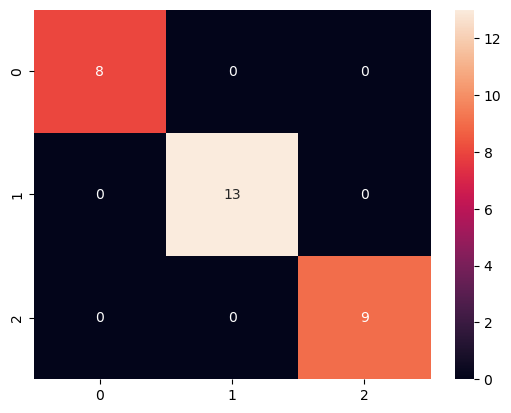

In [22]:
CM_CLF=confusion_matrix(y_test,y_preds)

print(CM_CLF)

sns.heatmap(CM_CLF,annot=True)

plt.show()

## Compute the accuracy score (same as the score() method for classifiers)

In [23]:
 accuracy_score(y_test, y_preds)

1.0

## mesh grid for plotting

## Predict on the mesh grid

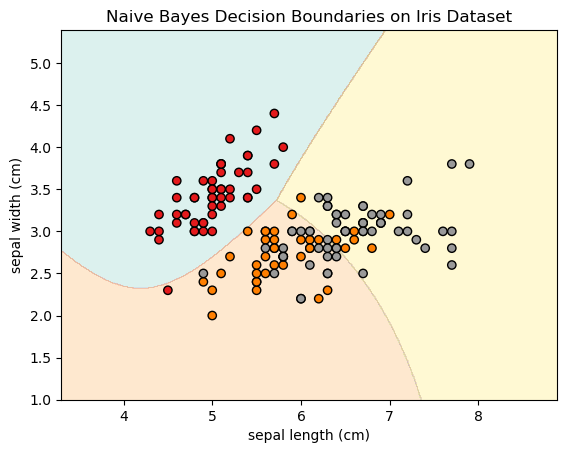

In [24]:
iris = load_iris()
X = iris.data[:, :2]  
y = iris.target
clf = GaussianNB(priors=[0.34, 0.33, 0.33],var_smoothing=1e-09)
model.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set3) 
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)  
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Naive Bayes Decision Boundaries on Iris Dataset")
plt.show()


## mesh grid for plotting

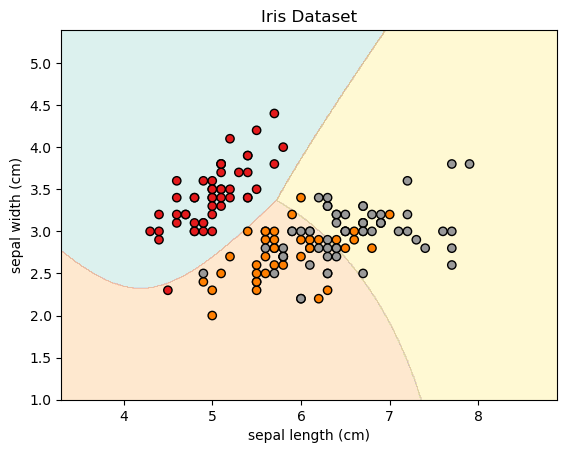

In [25]:
iris = load_iris()
X = iris.data[:, :-2]  
y = iris.target
clf = GaussianNB(priors=[0.34, 0.33, 0.33],var_smoothing=1e-09)
model.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set3)  
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1) 
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset")
plt.show()


In [26]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
61,5.9,3.0,4.2,1.5
90,5.5,2.6,4.4,1.2
30,4.8,3.1,1.6,0.2
31,5.4,3.4,1.5,0.4


In [27]:
clf.fit(X_train, y_train)

GaussianNB(priors=[0.34, 0.33, 0.33])

In [28]:
predictions = clf.predict(X_test[1:2])

In [29]:
print(predictions)

['Iris-versicolor']


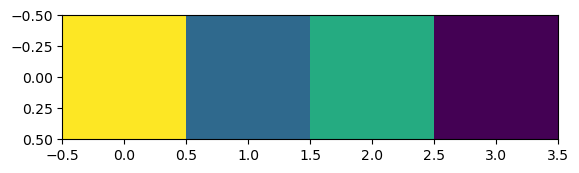

In [30]:
plt.imshow(X_test[1:2])

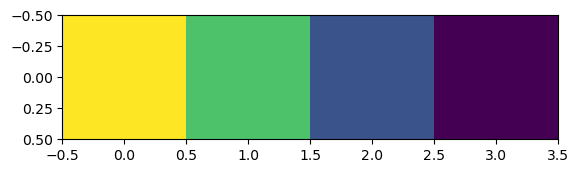

In [31]:
plt.imshow(X_test[0:1])